1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

Covariance matricx:
 [[ 1.01904291  1.04749824  3.08558405]
 [ 1.04749824 10.53934007 12.63433655]
 [ 3.08558405 12.63433655 18.80550466]] 

Spectrum is:
 [2.83209961e+01+0.j 5.25482288e-17+0.j 2.04289153e+00+0.j] 

Eigenvectors matrix is:
 [[-0.11342587 -0.81649658  0.56609885]
 [-0.57990079 -0.40824829 -0.7050166 ]
 [-0.80675253  0.40824829  0.42718109]] 

Spectrum is:
 [2.83209961e+01 2.04289153e+00 1.25121516e-15] 

Eigenvectors matrix is:
 [[-0.11342587  0.56609885 -0.81649658]
 [-0.57990079 -0.7050166  -0.40824829]
 [-0.80675253  0.42718109  0.40824829]] 

Percentage of the first (greater) eigenvalue:
 0.9327196979441494 

Printing rotated data:
 [[-1.79474116e+00 -2.51950256e+00  2.35767121e+00 ...  8.68002688e+00
  -2.84761256e+00  2.89157717e+00]
 [-5.42961716e-01  8.23547054e-01  1.45068459e+00 ... -4.67942495e-01
  -3.91002461e-01  1.49516137e-01]
 [ 2.36204252e-16 -9.44348124e-16 -9.62644048e-16 ...  1.23368089e-15
   8.47584648e-19  3.20768653e-17]] 

[[-1.79474116 -2.5195

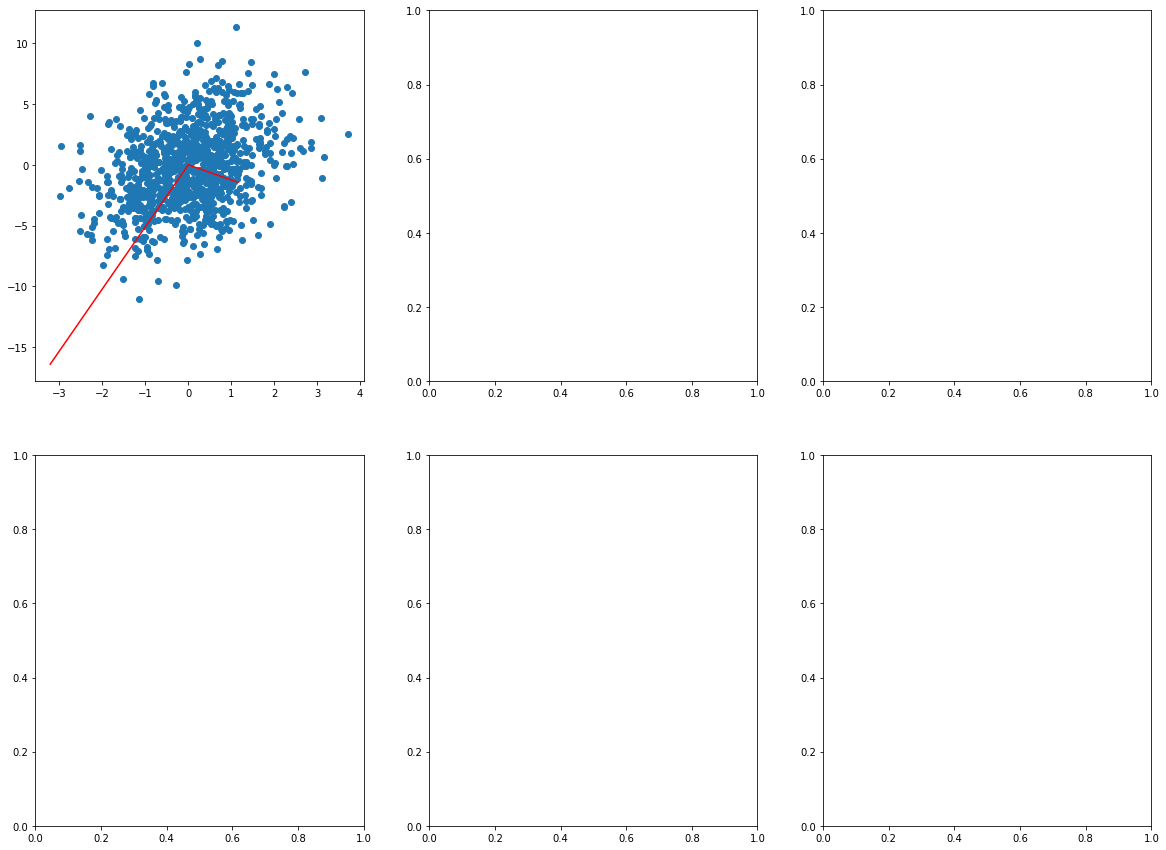

In [7]:
N = 1000
mean = 0.
std = 1.
x1 = np.random.normal(0., 1., N)
x2 = x1 + np.random.normal(0., 3., N)
x3 = 2*x1 + x2

x123 = np.array([x1, x2, x3])

# print(np.dot(x123, x123.T)/(N-1))       # Sbagliata perché non considero le medie effettive

cov_x123 = np.cov(x123)

print("Covariance matricx:\n", cov_x123, "\n")

spectrum_np, eig_V_np = la.eig(cov_x123)

print("Spectrum is:\n", spectrum_np, "\n")
print("Eigenvectors matrix is:\n", eig_V_np, "\n")

eig_V_sci, spectrum_sci, eig_U_sci = la.svd(cov_x123)

print("Spectrum is:\n", spectrum_sci, "\n")
print("Eigenvectors matrix is:\n", eig_V_sci, "\n")

perc_first = spectrum_sci.max()/np.sum(spectrum_sci)

print("Percentage of the first (greater) eigenvalue:\n", perc_first, "\n")

perc_99 = 0
i = 0

while perc_99 < 0.99:
    perc_99 += spectrum_sci[i]/np.sum(spectrum_sci)
    i += 1

spectrum_sci[i:] = 0

# print("New spectrum (99%) is:\n", spectrum_sci, "\n")

'''
# Re-building initial cov matrix
#Diag_sci = np.zeros((len(spectrum_sci), len(scpectrum_sci)))
#for ele in len(spectrum_sci):
#    Diag_sci[]

Diag_sci = np.diag(spectrum_sci)

print("The diagonal (new) matrix is:\n", Diag_sci, "\n")

cov_PCA = eig_V_sci.dot(Diag_sci.dot(eig_V_sci.T))

print("Covariance matrix after PCA (reconstructed):\n", cov_PCA, "\n")
'''

x123_rot = eig_V_sci.T.dot(x123)

print("Printing rotated data:\n", x123_rot, "\n")

# Deleting the "smallest" row

x123_rot = x123_rot[:i]         # N.B.: SVD gives a matrix with ordered eigen-vectors, so one can simply remove
                                #       remove the last rows

print(x123_rot)

fig = plt.figure(figsize=(20,15))

ax00 = plt.subplot2grid((2,3), (0,0))
ax01 = plt.subplot2grid((2,3), (0,1))
ax02 = plt.subplot2grid((2,3), (0,2))
ax10 = plt.subplot2grid((2,3), (1,0))
ax11 = plt.subplot2grid((2,3), (1,1))
ax12 = plt.subplot2grid((2,3), (1,2))



ax00.scatter(x123[0,:], x123[1,:])     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x2) plane
ax00.plot([0, spectrum_sci[0]*eig_V_sci[0][0]], [0, spectrum_sci[0]*eig_V_sci[1][0]], 'r-')
ax00.plot([0, spectrum_sci[1]*eig_V_sci[0][1]], [0, spectrum_sci[1]*eig_V_sci[1][1]], 'r-')
ax00.plot([0, spectrum_sci[2]*eig_V_sci[0][2]], [0, spectrum_sci[2]*eig_V_sci[1][2]], 'r-')

ax01.scatter(x123[0,:], x123[2,:])     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x2) plane
ax01.plot([0, spectrum_sci[0]*eig_V_sci[0][0]], [0, spectrum_sci[0]*eig_V_sci[2][0]], 'r-')
ax01.plot([0, spectrum_sci[1]*eig_V_sci[0][1]], [0, spectrum_sci[1]*eig_V_sci[2][1]], 'r-')
ax01.plot([0, spectrum_sci[2]*eig_V_sci[0][2]], [0, spectrum_sci[2]*eig_V_sci[2][2]], 'r-')

ax02.scatter(x123[0,:], x123[1,:])     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x2) plane
ax02.plot([0, spectrum_sci[0]*eig_V_sci[0][0]], [0, spectrum_sci[0]*eig_V_sci[1][0]], 'r-')
ax02.plot([0, spectrum_sci[1]*eig_V_sci[0][1]], [0, spectrum_sci[1]*eig_V_sci[1][1]], 'r-')
ax02.plot([0, spectrum_sci[2]*eig_V_sci[0][2]], [0, spectrum_sci[2]*eig_V_sci[1][2]], 'r-')

ax10.scatter(x123[0,:], x123[1,:])     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x2) plane
ax10.plot([0, spectrum_sci[0]*eig_V_sci[0][0]], [0, spectrum_sci[0]*eig_V_sci[1][0]], 'r-')
ax10.plot([0, spectrum_sci[1]*eig_V_sci[0][1]], [0, spectrum_sci[1]*eig_V_sci[1][1]], 'r-')
ax10.plot([0, spectrum_sci[2]*eig_V_sci[0][2]], [0, spectrum_sci[2]*eig_V_sci[1][2]], 'r-')

ax11.scatter(x123[0,:], x123[1,:])     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x2) plane
ax11.plot([0, spectrum_sci[0]*eig_V_sci[0][0]], [0, spectrum_sci[0]*eig_V_sci[1][0]], 'r-')
ax11.plot([0, spectrum_sci[1]*eig_V_sci[0][1]], [0, spectrum_sci[1]*eig_V_sci[1][1]], 'r-')
ax11.plot([0, spectrum_sci[2]*eig_V_sci[0][2]], [0, spectrum_sci[2]*eig_V_sci[1][2]], 'r-')

ax12.scatter(x123[0,:], x123[1,:])     # Plot of 2 coordinates
# Plotting the projections of the 3 eigenvectors on the (x1,x2) plane
ax12.plot([0, spectrum_sci[0]*eig_V_sci[0][0]], [0, spectrum_sci[0]*eig_V_sci[1][0]], 'r-')
ax12.plot([0, spectrum_sci[1]*eig_V_sci[0][1]], [0, spectrum_sci[1]*eig_V_sci[1][1]], 'r-')
ax12.plot([0, spectrum_sci[2]*eig_V_sci[0][2]], [0, spectrum_sci[2]*eig_V_sci[1][2]], 'r-')


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [76]:
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
#    fi = np.arccos(vec[2])
#    theta = vec[0]/np.sin(fi)
#    return theta, fi
    return vec

cameras = np.array(sample_spherical(10))

print(cameras)

x = np.linspace(0, 6*np.pi, 1000)

r = 1.

x_spring = np.array(r*np.cos(x))

#print(spring_motion)

spring_motion = np.array([x_spring, np.random.normal(loc=0, scale=0.1, size=1000), np.zeros(1000)])

spring_motion = spring_motion.T

data_ = np.zeros(shape=(1000, 3, 10))

print(spring_motion.shape)
print(len(cameras.T))
print(len(spring_motion))
print(len(spring_motion[1]))

for ccam in range(len(cameras.T)):
    for cmeasure in range(len(spring_motion)):
        for ccoord in range(len(spring_motion[cmeasure])):
            data_[cmeasure][ccoord][ccam] = spring_motion[cmeasure][ccoord] - np.dot(cameras.T[ccam], spring_motion[cmeasure])*spring_motion[cmeasure][ccoord]/np.norm(spring_motion[cmeasure][ccoord])

#print(data_[:,:,0].shape)

for ccam in range(len(cameras.T)):
    cov_m = np.cov((data_[:,:,ccam]).T)
    
    print(cov_m.shape)
    
    eig_V, spectrum, eig_V_T = la.svd(cov_m)
    data_rot = np.dot(eig_V_T, (data_[:,:,ccam]).T)
    
    print(data_rot.shape)
        
#    i=1
#    while np.sum(spectrum[:i])/spectrum.sum() < 0.99:
#        i += 1
#    
#    spectrum = spectrum[:i]
#    data_rot = data_rot[0:i,:]
    
    #print(data_rot[:,1].shape)
#    fot i in range(len(data_rot)):
    plt.scatter(data_rot[0,:], data_rot[1,:])
    plt.show()
    
print(data_rot)


[[ 0.62167185  0.21840535  0.07640055 -0.43097962 -0.55013132 -0.94468874
   0.51523105 -0.88154112  0.34139042 -0.7863097 ]
 [-0.75634564  0.63671281 -0.62713832 -0.1043659   0.29789549  0.32122834
   0.0818545  -0.46799081 -0.73789386  0.50787209]
 [-0.2036305   0.73952411  0.77515191 -0.89630593 -0.78013704  0.06614784
   0.85313352  0.06220807 -0.58220721  0.35182807]]
(1000, 3)
10
1000
3


AttributeError: module 'numpy' has no attribute 'norm'

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset